# Explore here

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

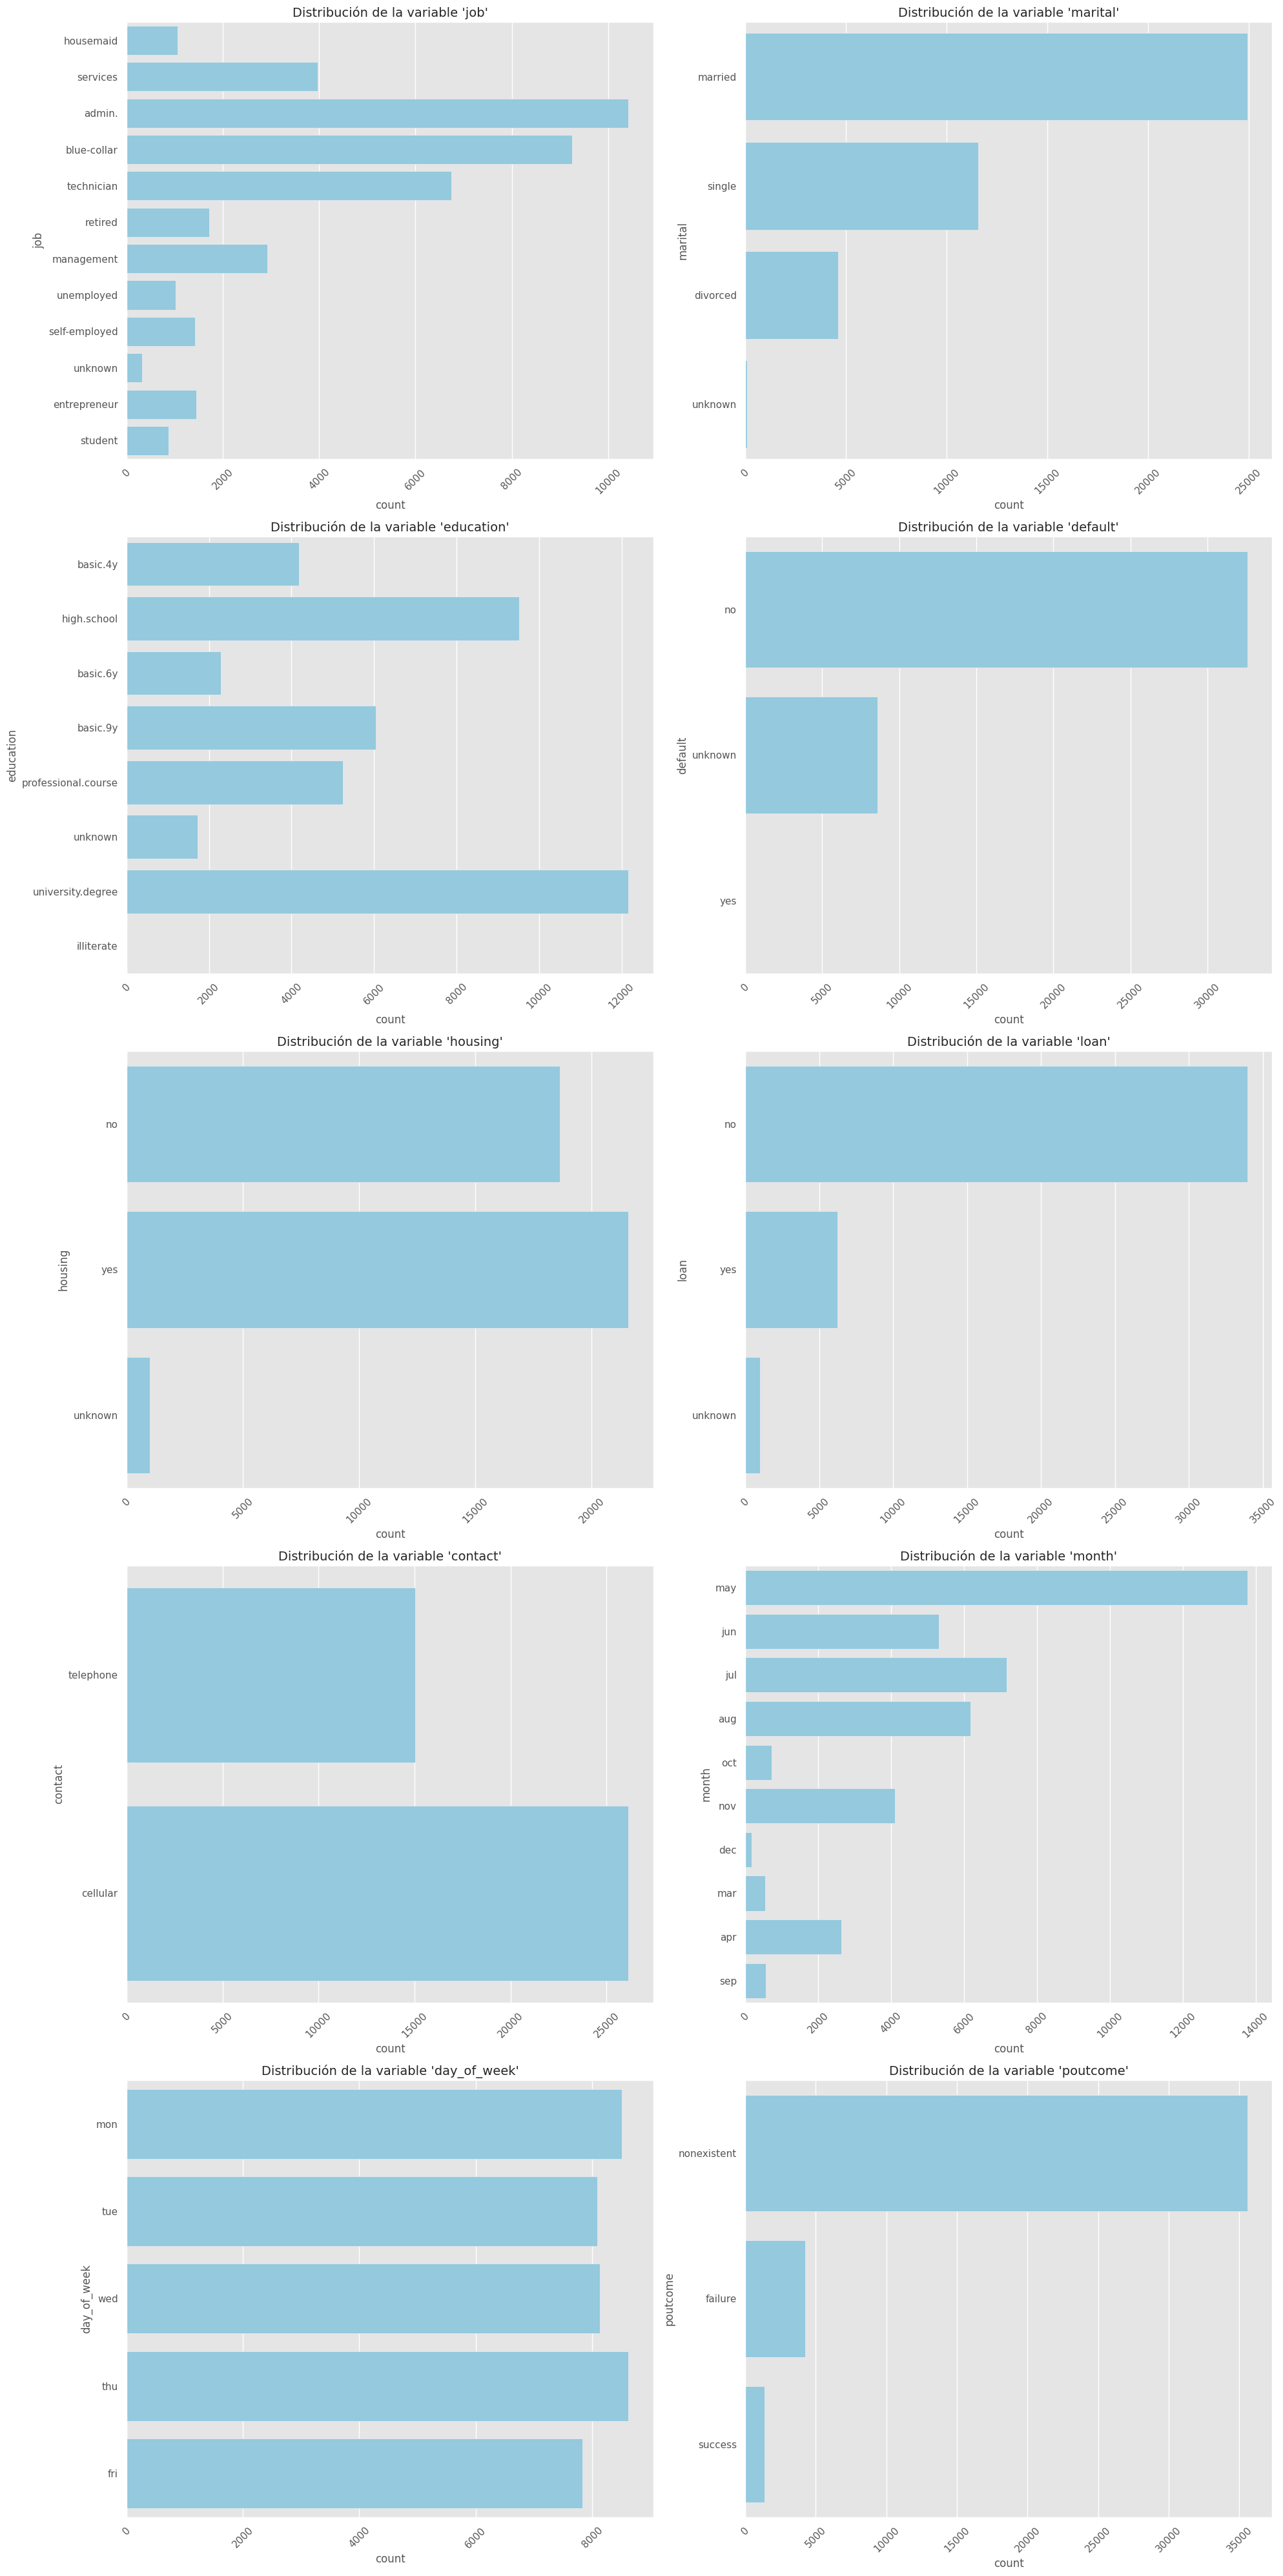

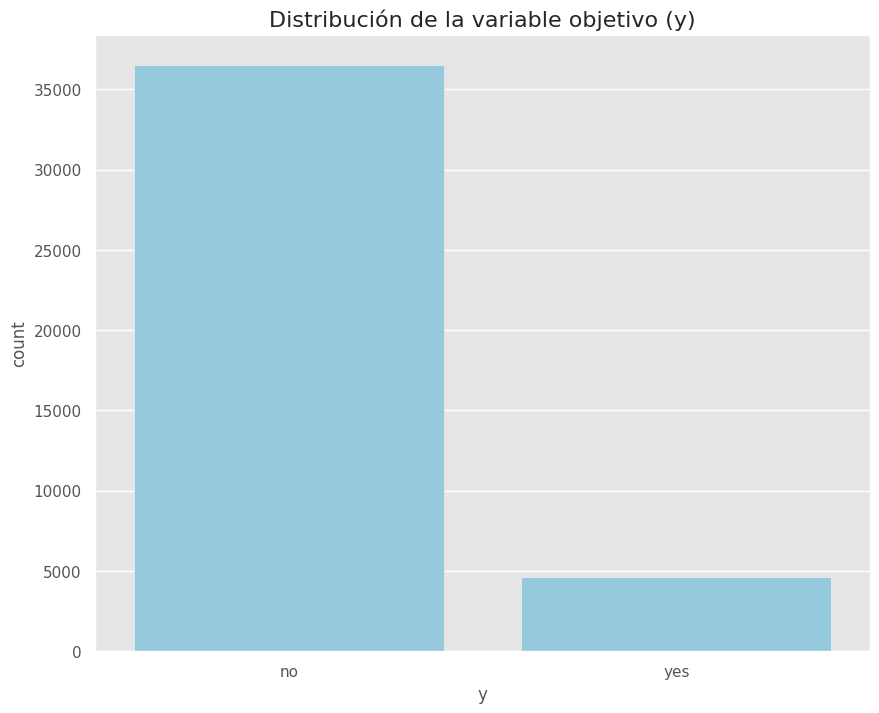

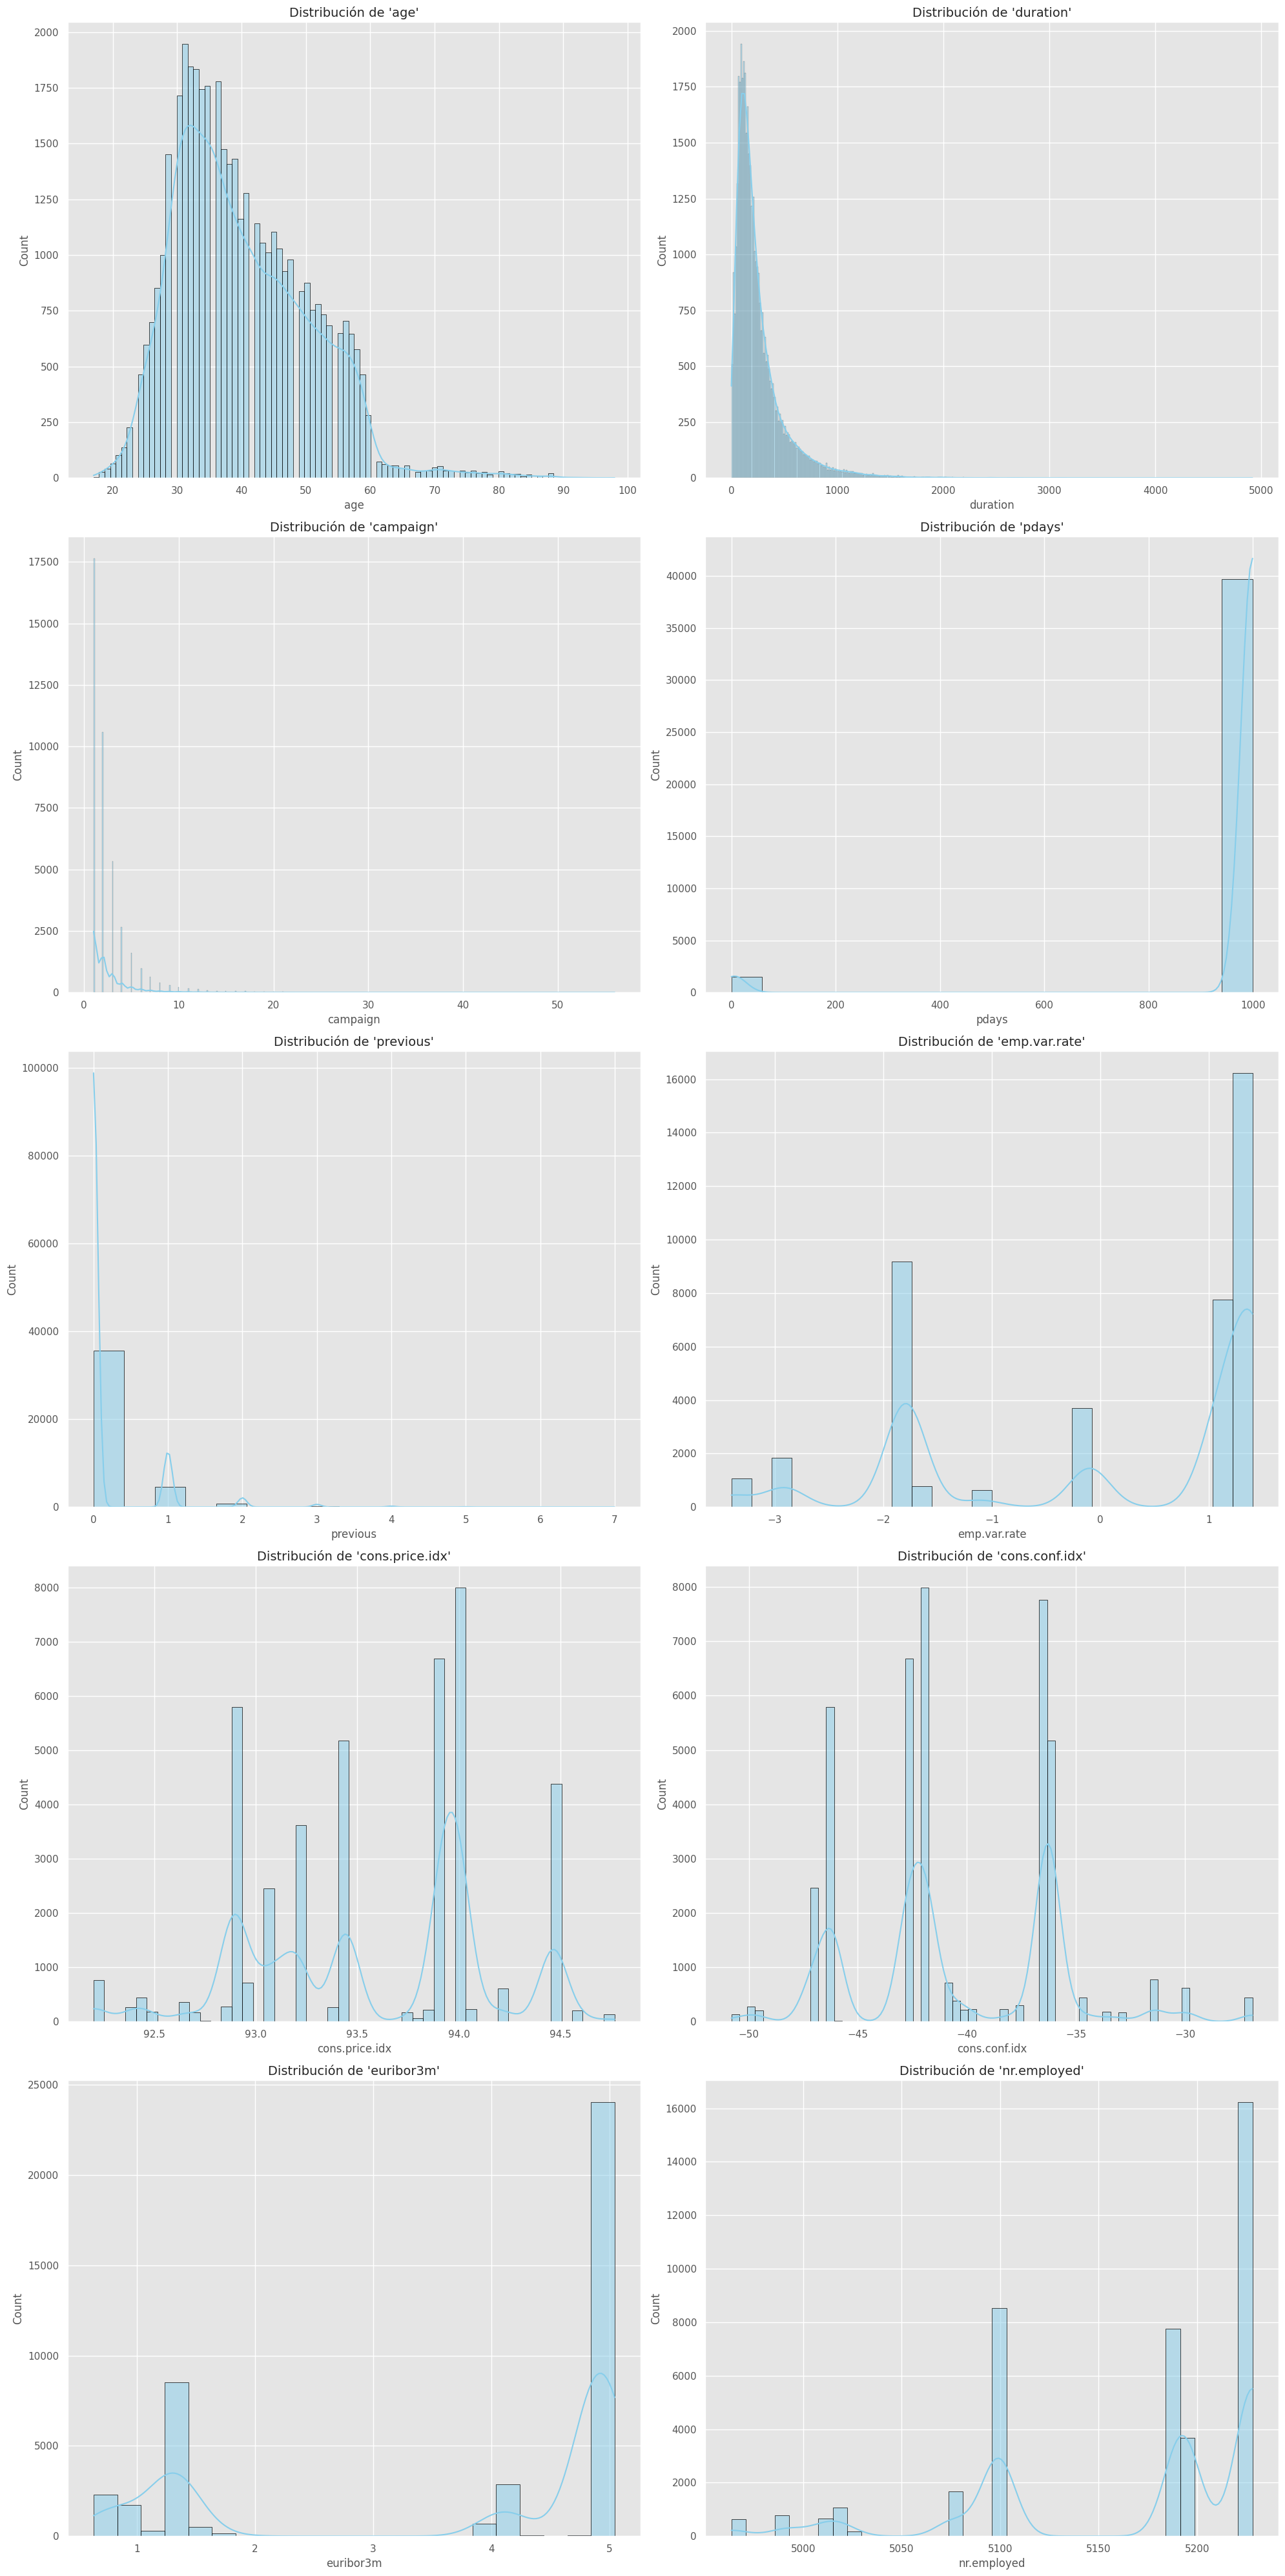

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [2]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Definir un color suave
soft_color = 'skyblue'

# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data = pd.read_csv(url, sep=';')

# Mostrar las primeras filas del conjunto de datos
print(data.head())

# Análisis de variables categóricas
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(20, 40))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=var, data=data, color=soft_color)
    plt.title(f"Distribución de la variable '{var}'", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización de la variable objetivo
plt.figure(figsize=(10, 8))
sns.countplot(x='y', data=data, color=soft_color)
plt.title('Distribución de la variable objetivo (y)', fontsize=16)
plt.show()

# Análisis de variables numéricas
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(20, 40))
for i, var in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(data[var], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de '{var}'", fontsize=14)
plt.tight_layout()
plt.show()

# Verificar valores faltantes
print(data.isnull().sum())

In [3]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv'
data = pd.read_csv(url, sep=';')

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

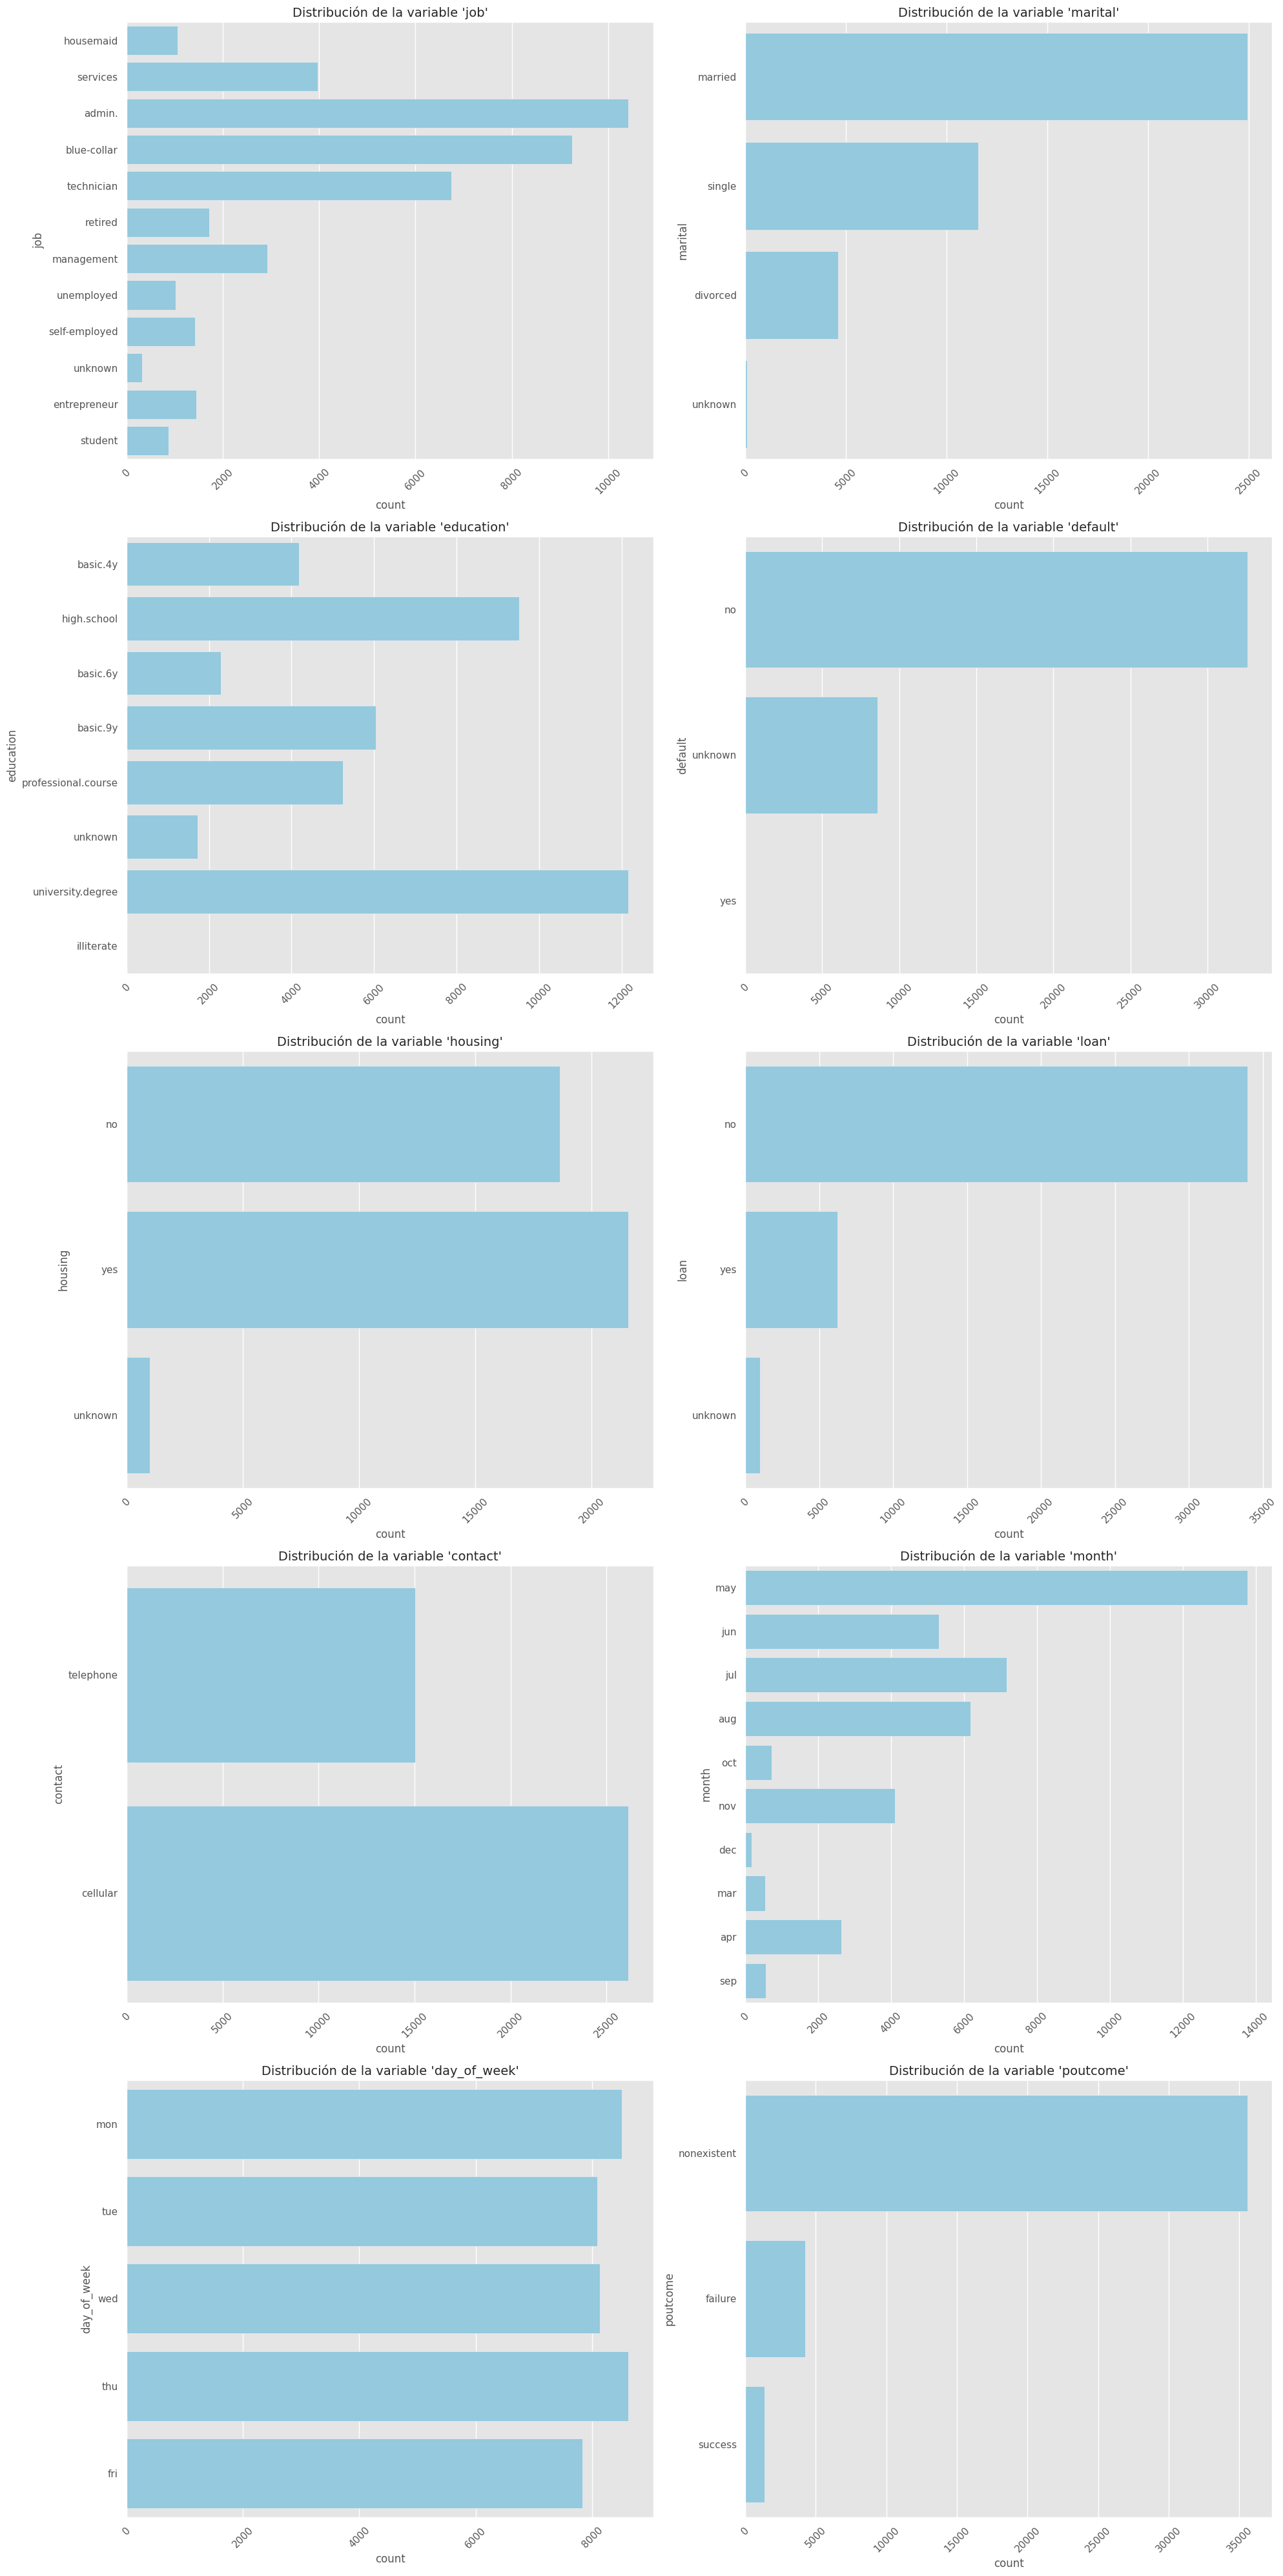

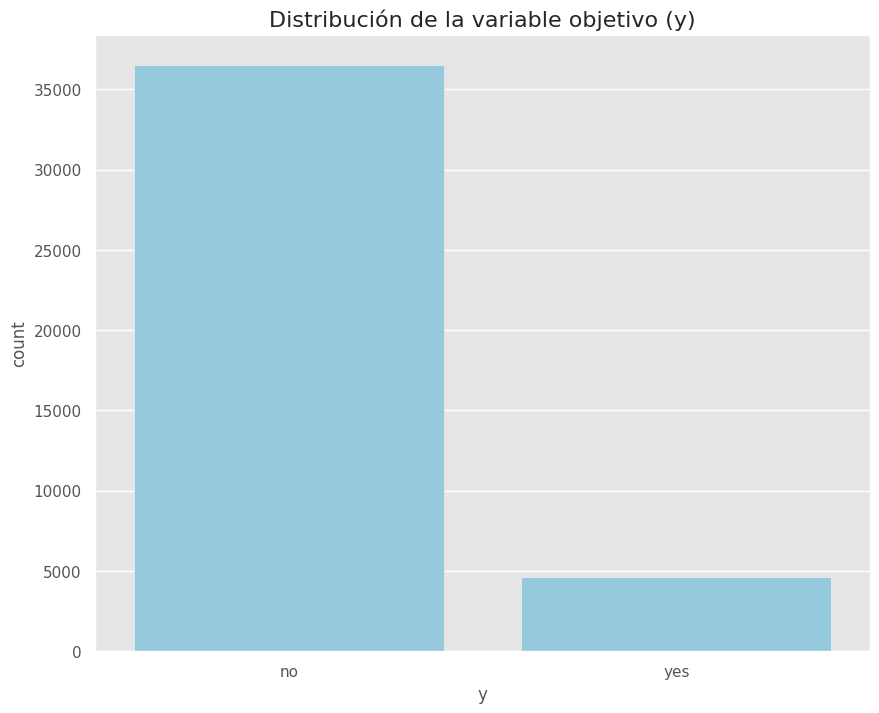

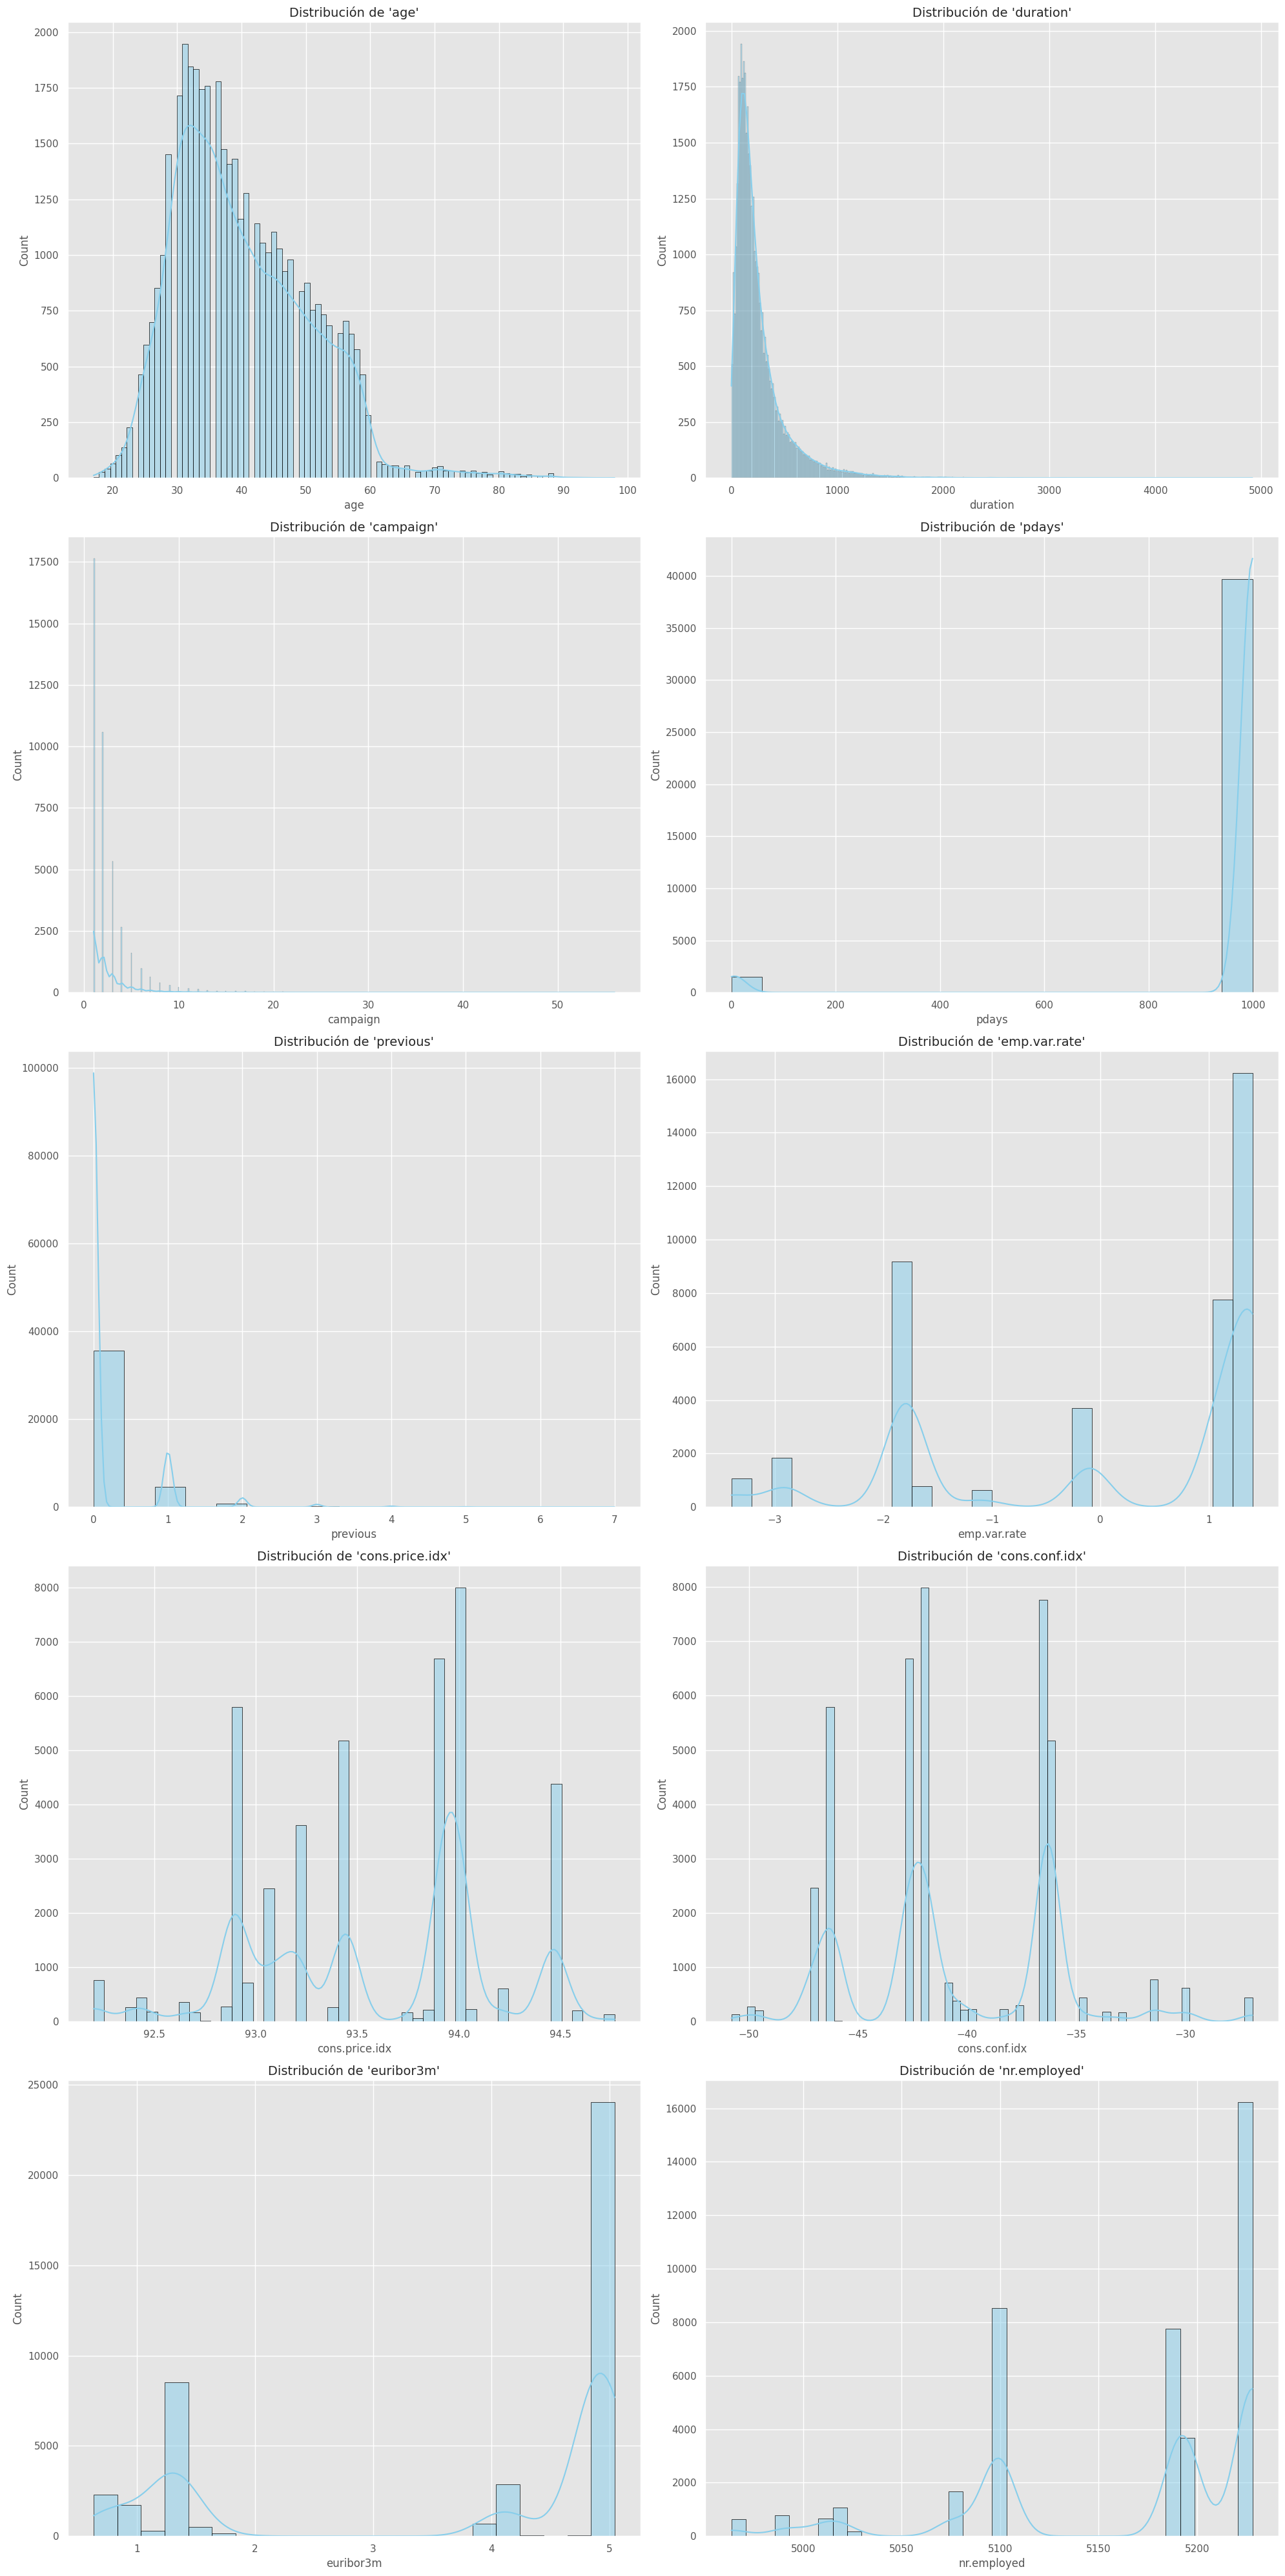

In [4]:
# Mostrar las primeras filas del conjunto de datos
print(data.head())
# Verificar valores faltantes
print(data.isnull().sum())

# Análisis de variables categóricas
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
plt.figure(figsize=(20, 40))
for i, var in enumerate(categorical_vars):
    plt.subplot(5, 2, i+1)
    sns.countplot(y=var, data=data, color=soft_color)
    plt.title(f"Distribución de la variable '{var}'", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualización de la variable objetivo
plt.figure(figsize=(10, 8))
sns.countplot(x='y', data=data, color=soft_color)
plt.title('Distribución de la variable objetivo (y)', fontsize=16)
plt.show()

# Análisis de variables numéricas
num_vars = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
plt.figure(figsize=(20, 40))
for i, var in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(data[var], kde=True, color='skyblue', edgecolor='black')
    plt.title(f"Distribución de '{var}'", fontsize=14)
plt.tight_layout()
plt.show()

In [8]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV

# Separar las características y la variable objetivo
X = data.drop('y', axis=1)
y = data['y']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Codificación de variables categóricas y normalización de variables numéricas
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Aplicar el preprocesamiento
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_preprocessed, y_train)

# Definir el modelo de regresión logística
model = LogisticRegression(max_iter=2000, class_weight='balanced')

# Definir los parámetros para GridSearchCV
param_grid = {
    'solver': ['liblinear', 'lbfgs'],
    'C': [0.1, 1, 10, 100]
}

# Definir GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Entrenamiento del modelo con GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Mejor modelo encontrado por GridSearchCV
best_model = grid_search.best_estimator_

# Predicciones
y_pred = best_model.predict(X_test_preprocessed)

# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Guardar los resultados
with open('data/processed/confusion_matrix.txt', 'w') as f:
    f.write(str(conf_matrix))

with open('data/processed/classification_report.txt', 'w') as f:
    f.write(class_report)

FileNotFoundError: [Errno 2] No such file or directory: 'data/processed/confusion_matrix.txt'

In [6]:
# Evaluación del modelo
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Guardar los resultados
with open('data/processed/confusion_matrix.txt', 'w') as f:
    f.write(str(conf_matrix))

with open('data/processed/classification_report.txt', 'w') as f:
    f.write(class_report)

# Guardar los conjuntos de datos procesados
X_train.to_csv('data/processed/X_train.csv', index=False)
X_test.to_csv('data/processed/X_test.csv', index=False)
y_train.to_csv('data/processed/y_train.csv', index=False)
y_test.to_csv('data/processed/y_test.csv', index=False)

NameError: name 'y_test' is not defined